## Importing dependencies

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("heart_train.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.drop(columns="id", inplace=True, axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df["cardio"].value_counts(normalize=True)

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

In [9]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
df.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


In [18]:
import pandas as pd
import matplotlib.pyplot as plt


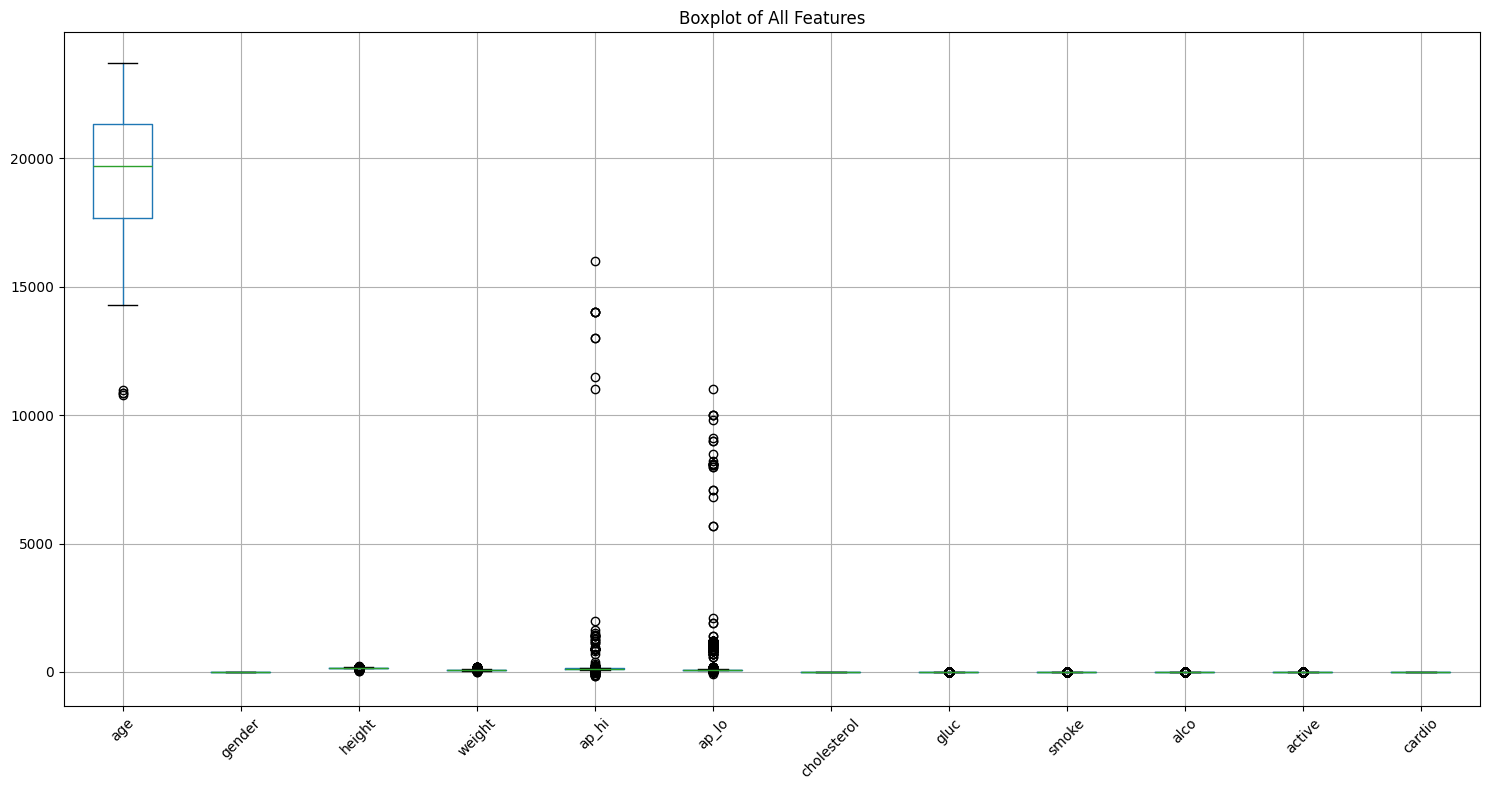

In [20]:
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

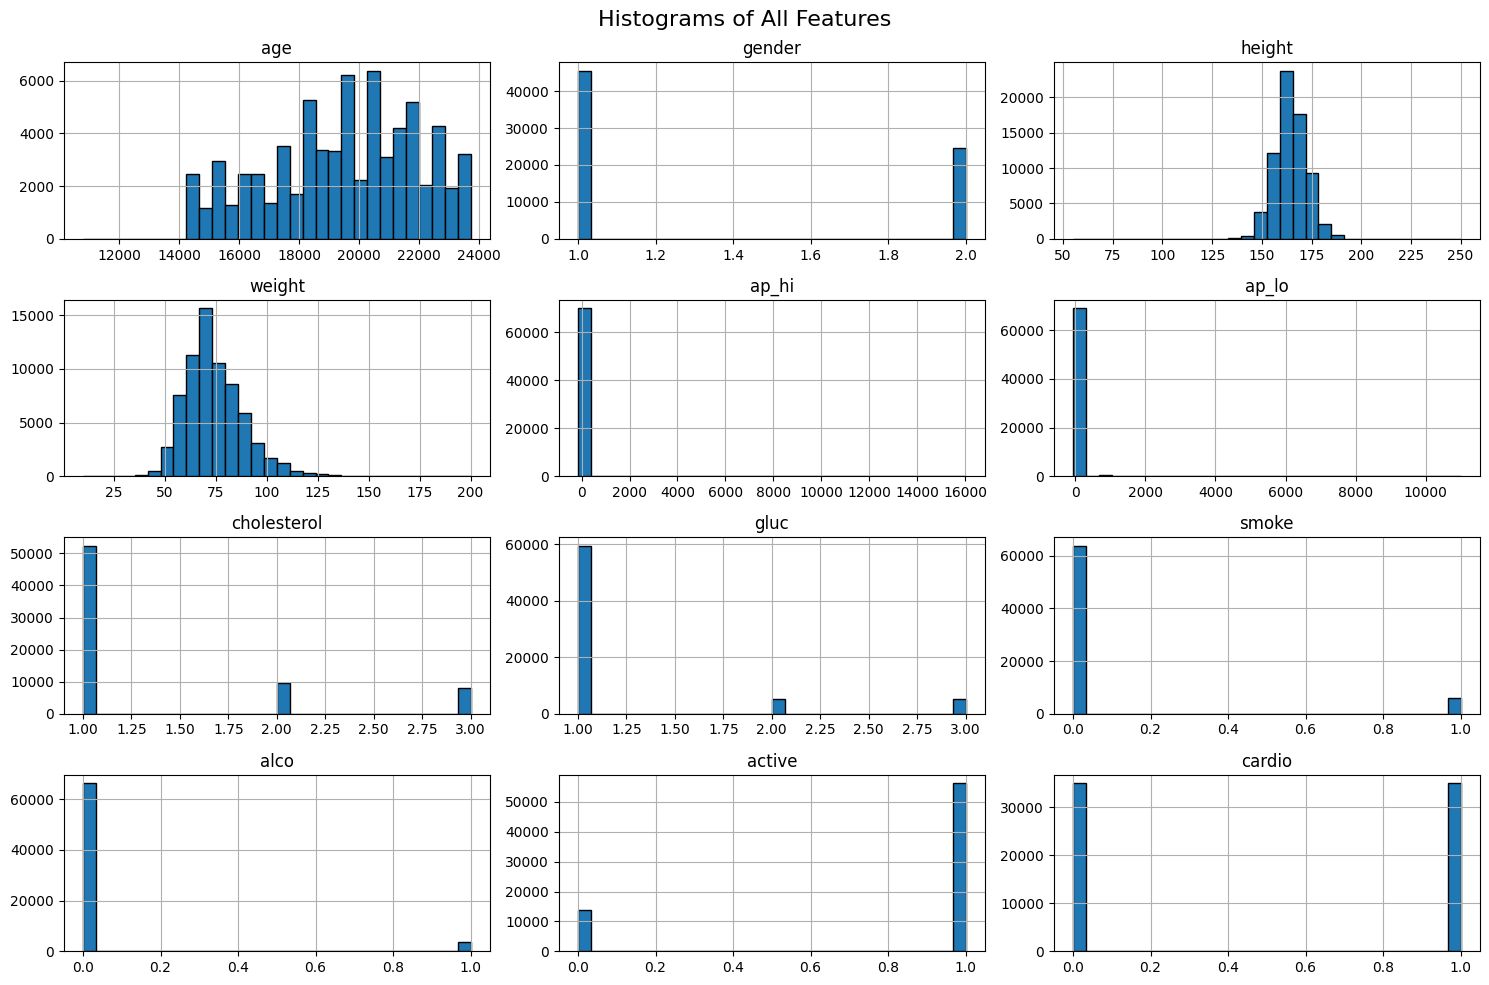

In [21]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

### Removing invalid bp rows

In [30]:
df = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 200)]

### Clipping weight values

In [31]:
df['weight'] = df['weight'].clip(40, 150)
df['height'] = df['height'].clip(120, 220)

### Log transforming the weight col

In [32]:
import numpy as np
df['weight'] = np.log1p(df['weight'])  # log1p handles 0s safely

In [33]:
df.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68775.00,68775.00,68775.00,68775.00,68775.00,68775.00,68775.00,68775.00,68775.00,68775.00,68775.0,68775.00
mean,19464.48,1.35,164.38,3.71,126.61,81.38,1.36,1.23,0.09,0.05,0.8,0.49
std,2468.13,0.48,8.00,0.00,16.76,9.68,0.68,0.57,0.28,0.23,0.4,0.50
min,10798.00,1.00,120.00,3.71,60.00,40.00,1.00,1.00,0.00,0.00,0.0,0.00
25%,17657.00,1.00,159.00,3.71,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00
50%,19701.00,1.00,165.00,3.71,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00
75%,21324.00,2.00,170.00,3.71,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.00
max,23713.00,2.00,220.00,3.71,240.00,190.00,3.00,3.00,1.00,1.00,1.0,1.00


### Revisualising the data for confirmation

#### Using boxplot

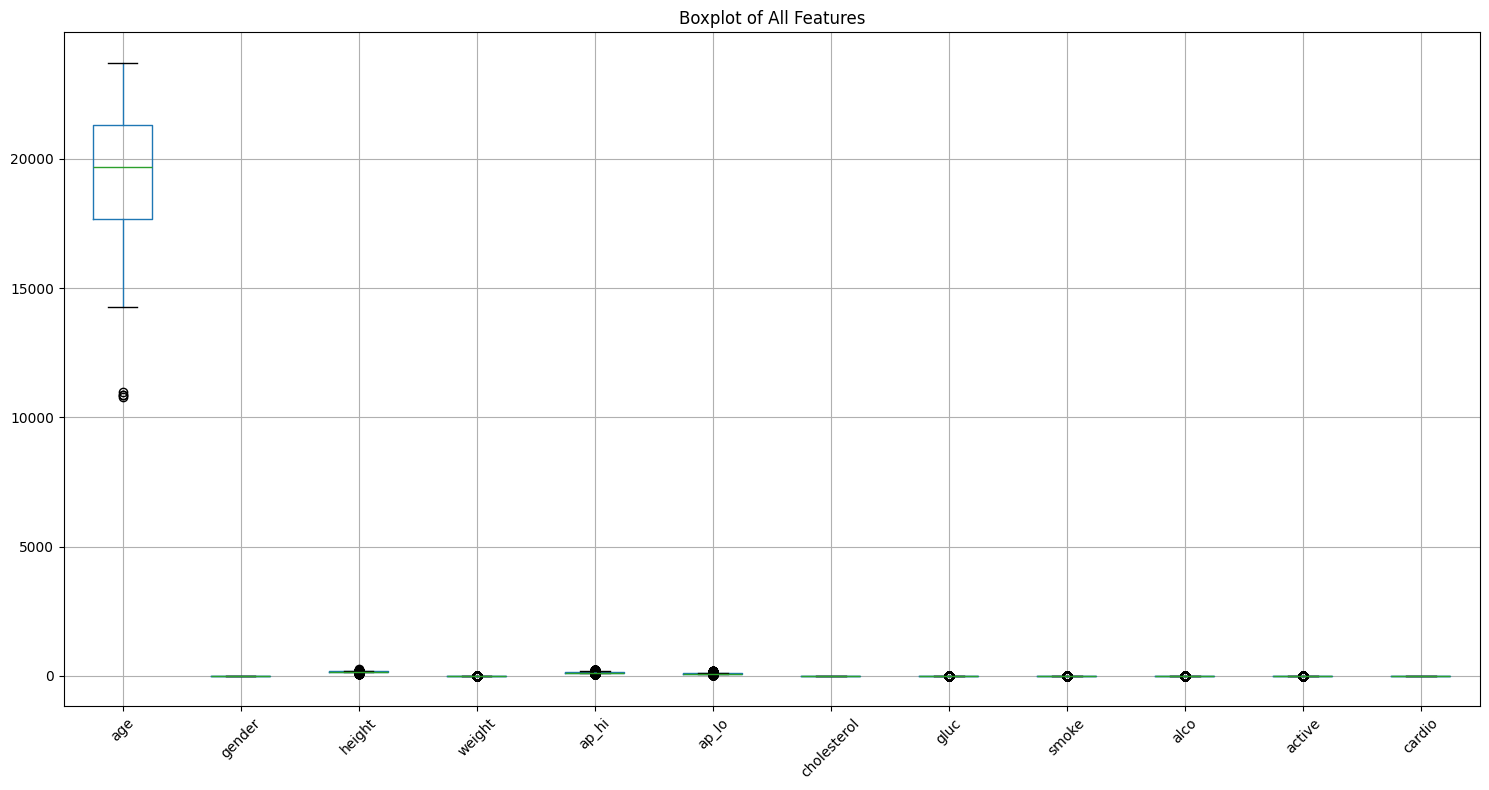

In [27]:
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Using Histogram

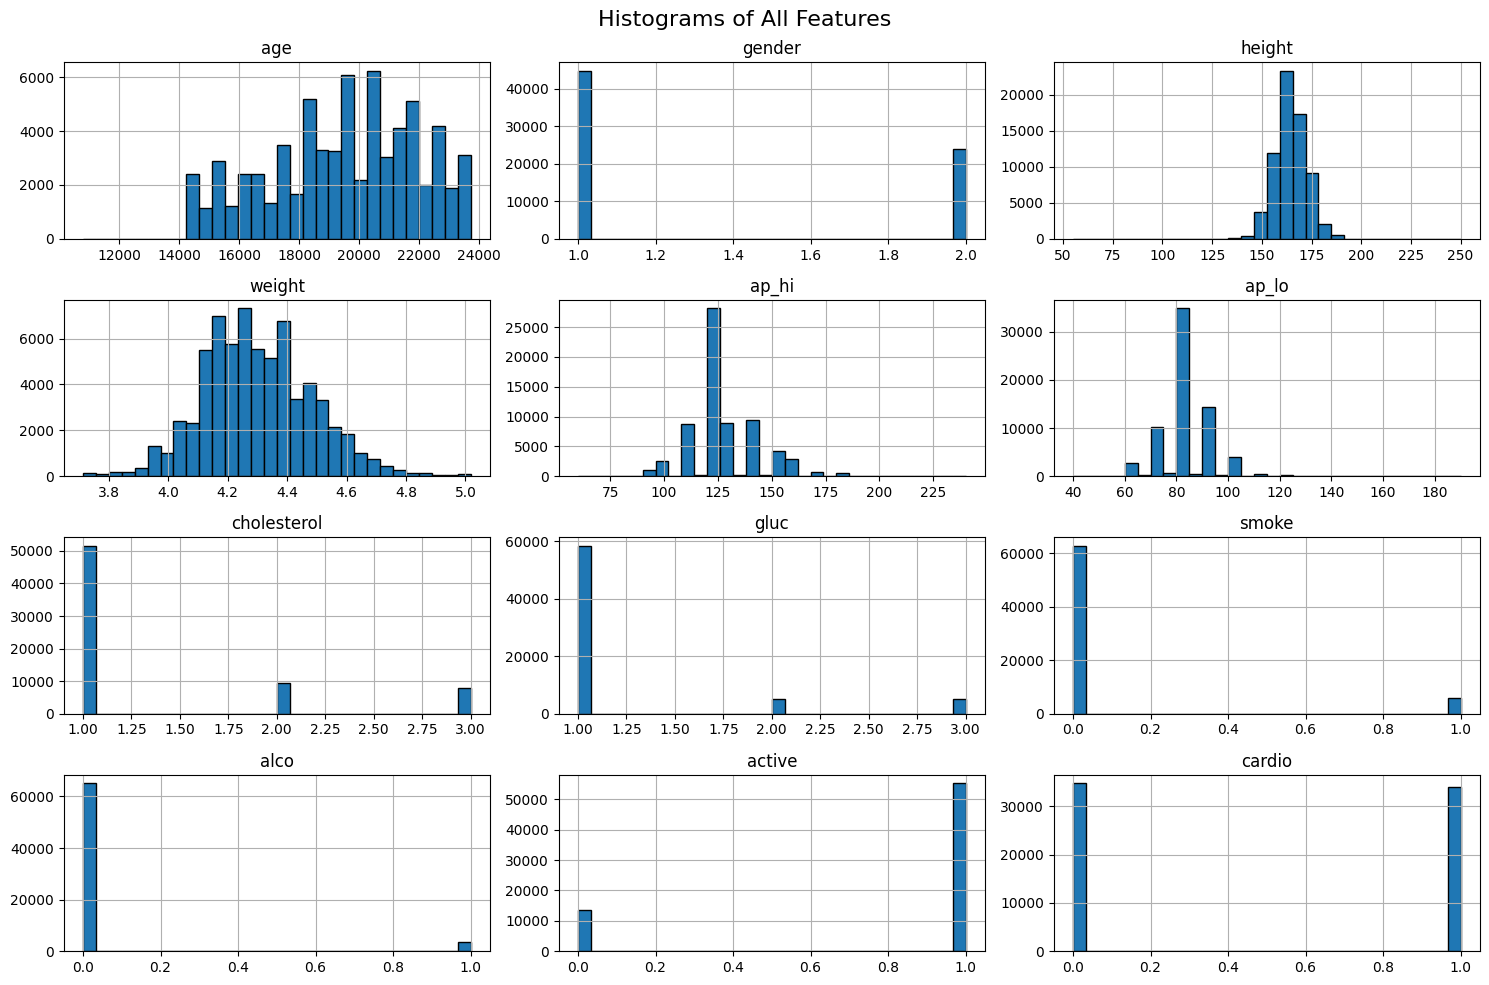

In [28]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

## 3 types of preprocessing done in the data:
- Removed invalid values (like insane BP readings)
- Clipped extreme but valid values (like very high weight)
- Applied log scale where skewed
- Visually and statistically re-checked the data (via .describe(), boxplot, hist)

---

Now, the data is ready to be used for modeling

In [29]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,4.143135,110,80,1,1,0,0,1,0
1,20228,1,156,4.454347,140,90,3,1,0,0,1,1
2,18857,1,165,4.174387,130,70,3,1,0,0,0,1
3,17623,2,169,4.418841,150,100,1,1,0,0,1,1
4,17474,1,156,4.043051,100,60,1,1,0,0,0,0


## Accuracy remain the same even after preprocessing so the new type of preprocessing is being done here


#### Age in years


In [34]:
df['age_years'] = (df['age'] / 365).astype(int)

#### BMI

In [35]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

#### Pulse pressure

In [36]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

#### Binary cholesterol and glucose

In [37]:
df['cholesterol_high'] = (df['cholesterol'] > 1).astype(int)
df['gluc_high'] = (df['gluc'] > 1).astype(int)

In [38]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,pulse_pressure,cholesterol_high,gluc_high
0,18393,2,168,3.713572,110,80,1,1,0,0,1,0,50,1.315750,30,0,0
1,20228,1,156,3.713572,140,90,3,1,0,0,1,1,55,1.525958,50,1,0
2,18857,1,165,3.713572,130,70,3,1,0,0,0,1,51,1.364030,60,1,0
3,17623,2,169,3.713572,150,100,1,1,0,0,1,1,48,1.300225,50,0,0
4,17474,1,156,3.713572,100,60,1,1,0,0,0,0,47,1.525958,40,0,0


In [40]:
df.shape

(68775, 17)

In [41]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'pulse_pressure', 'cholesterol_high', 'gluc_high'],
      dtype='object')